# Adversarial Attacks Against Eye Tracking Data

In [1]:
import numpy as np
import pandas as pd
import sklearn
from Reader.Reader import * 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_auc_score

## Base Model
The first part is setting up our base model. 
Here we will try to use different modelts to see whether we can predict if the user is engaged or not engaged to a work of art. 

### Load Dataframe 

In [2]:
Eye_Data_Path = "/home/franciscoAML/Documents/Privacy_Adversarial_Example/Eye_Data"
columns = ['Average Blink Rate','Focus Ratio', 'Average Focus Deviation Rate', 'Number of Focused Fixations', 'Mean Focused Fixation Duration',
                                    'Median Focused Fixation Duration', 'Time to First Fixation', 'RFDSD', 'Standard Deviation (X)', 'Standard Deviation (Y)',
                                    'Standard Distance (XY)', 'Number of Saccades', 'Mean Focused Saccade Amplitude', 'Median Focused Saccade Amplitude']
Dataframe = Reader(Eye_Data_Path).load_file()
print(Dataframe.shape)

Number of Files: 20
(20, 15)


In [3]:
# Read the Column Names
for col in Dataframe.columns:
    print(col)

Engagement
Average Blink Rate
Focus Ratio
Average Focus Deviation Rate
Number of Focused Fixations
Mean Focused Fixation Duration
Median Focused Fixation Duration
Time to First Fixation
RFDSD
Standard Deviation (X)
Standard Deviation (Y)
Standard Distance (XY)
Number of Saccades
Mean Focused Saccade Amplitude
Median Focused Saccade Amplitude


### Split the Dataframe
Here we need to split the dataset into x and y. Y being whether the user is engaged or not engaged. 


In [4]:
Y = pd.DataFrame(Dataframe["Engagement"])
X = Dataframe.drop(["Engagement"], axis=1)
print("Y Shape:", Y.shape)
print("X Shape:", X.shape)

Y Shape: (20, 1)
X Shape: (20, 14)


## Split the Model Into Cross Validation Dataset
Will use 70% for training and 30% for testing

In [5]:
# Import Necessary Package
from sklearn.model_selection import train_test_split

# Proceed to make the split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=.4)
print("Size of Training Dataset:", len(X_train))
print("Size of Testing Dataset:", len(X_test))

Size of Training Dataset: 12
Size of Testing Dataset: 8


## Models

### Training/Testing on Naive Bayes

Training Results
Accuracy on Training: 1.0
Precision on Training: 1.0
Recall on Training: 1.0
AUC on Training: 1.0

Testing Results
Accuracy on Testing: 0.75
Precision on Testing: 0.667
Recall on Testing: 1.0
AUC on Testing: 0.75


/home/franciscoAML/anaconda3/envs/AI/lib/python3.7/site-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


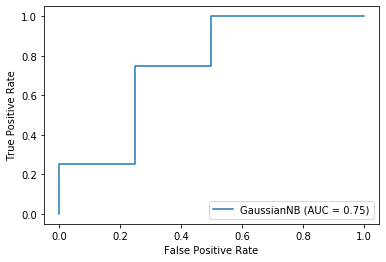

In [6]:
### Linear Support Vector Machine
from sklearn.naive_bayes import GaussianNB

## Proceed To Prepare Linear SVM 
linear_svc = GaussianNB()
linear_svc.fit(X_train, Y_train)

## Proceed to Test Performance on the Training Dataset
Y_train_predict = linear_svc.predict(X_train)

## Proceed to write accuracy
train_accuracy = accuracy_score(Y_train,Y_train_predict)
train_precision = precision_score(Y_train, Y_train_predict)
train_recall = recall_score(Y_train, Y_train_predict)
train_auc = roc_auc_score(Y_train, Y_train_predict)

print("Training Results")
print("Accuracy on Training:", round(train_accuracy,3))
print("Precision on Training:", round(train_precision, 3))
print("Recall on Training:", round(train_recall,3))
print("AUC on Training:", round(train_auc,3))

## Proceed to Test on Testing Dataset
Y_test_predict = linear_svc.predict(X_test)

# Proceed to Calculate Scores
test_accuracy = accuracy_score(Y_test,Y_test_predict)
test_precision = precision_score(Y_test, Y_test_predict)
test_recall = recall_score(Y_test, Y_test_predict)
test_auc = roc_auc_score(Y_test, Y_test_predict)

print("\nTesting Results")
print("Accuracy on Testing:", round(test_accuracy,3))
print("Precision on Testing:", round(test_precision, 3))
print("Recall on Testing:", round(test_recall,3))
print("AUC on Testing:", round(test_auc,3))

# Save Values
original_naive_bayes_test_accuracy = test_accuracy
original_naive_bayes_test_precision = test_precision 
original_naive_bayes_test_recall = test_recall
original_naive_bayes_test_auc = test_auc


## Proceed to Graph ROC Curve
plot_roc_curve(linear_svc, X_test, Y_test)

### Training/Testing Linear SVM

/home/franciscoAML/anaconda3/envs/AI/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Results
Accuracy on Training: 1.0
Precision on Training: 1.0
Recall on Training: 1.0
AUC on Training: 1.0

Testing Results
Accuracy on Testing: 0.875
Precision on Testing: 1.0
Recall on Testing: 0.75
AUC on Testing: 0.875


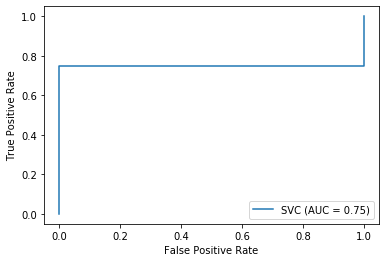

In [7]:
### Linear Support Vector Machine
from sklearn import svm

## Proceed To Prepare Linear SVM 
linear_svc = svm.SVC(kernel='linear')
linear_svc.fit(X_train, Y_train)

## Proceed to Test Performance on the Training Dataset
Y_train_predict = linear_svc.predict(X_train)

## Proceed to write accuracy
train_accuracy = accuracy_score(Y_train,Y_train_predict)
train_precision = precision_score(Y_train, Y_train_predict)
train_recall = recall_score(Y_train, Y_train_predict)
train_auc = roc_auc_score(Y_train, Y_train_predict)

print("Training Results")
print("Accuracy on Training:", round(train_accuracy,3))
print("Precision on Training:", round(train_precision, 3))
print("Recall on Training:", round(train_recall,3))
print("AUC on Training:", round(train_auc,3))

## Proceed to Test on Testing Dataset
Y_test_predict = linear_svc.predict(X_test)

# Proceed to Calculate Scores
test_accuracy = accuracy_score(Y_test,Y_test_predict)
test_precision = precision_score(Y_test, Y_test_predict)
test_recall = recall_score(Y_test, Y_test_predict)
test_auc = roc_auc_score(Y_test, Y_test_predict)

print("\nTesting Results")
print("Accuracy on Testing:", round(test_accuracy,3))
print("Precision on Testing:", round(test_precision, 3))
print("Recall on Testing:", round(test_recall,3))
print("AUC on Testing:", round(test_auc,3))

# Save Values
original_linear_svm_test_accuracy = test_accuracy 
original_linear_svm_test_precision = test_precision
original_linear_svm_test_recall = test_recall
original_linear_svm_test_auc = test_auc

## Proceed to Graph ROC Curve
plot_roc_curve(linear_svc, X_test, Y_test)

### Training/Testing NonLinear SVM

Training Results
Accuracy on Training: 0.583
Precision on Training: 1.0
Recall on Training: 0.167
AUC on Training: 0.583

Testing Results
Accuracy on Testing: 0.875
Precision on Testing: 1.0
Recall on Testing: 0.75
AUC on Testing: 0.875


/home/franciscoAML/anaconda3/envs/AI/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


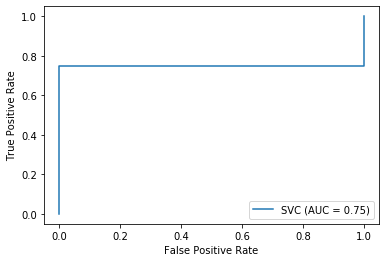

In [8]:
### RBF Support Vector Machine
from sklearn import svm

## Proceed To Prepare Linear SVM 
rbf_svc = svm.SVC(kernel='rbf')
rbf_svc.fit(X_train, Y_train)

## Proceed to Test Performance on the Training Dataset
Y_train_predict = rbf_svc.predict(X_train)

## Proceed to write accuracy
train_accuracy = accuracy_score(Y_train,Y_train_predict)
train_precision = precision_score(Y_train, Y_train_predict)
train_recall = recall_score(Y_train, Y_train_predict)
train_auc = roc_auc_score(Y_train, Y_train_predict)

print("Training Results")
print("Accuracy on Training:", round(train_accuracy,3))
print("Precision on Training:", round(train_precision, 3))
print("Recall on Training:", round(train_recall,3))
print("AUC on Training:", round(train_auc,3))

## Proceed to Test on Testing Dataset
Y_test_predict = linear_svc.predict(X_test)

# Proceed to Calculate Scores
test_accuracy = accuracy_score(Y_test,Y_test_predict)
test_precision = precision_score(Y_test, Y_test_predict)
test_recall = recall_score(Y_test, Y_test_predict)
test_auc = roc_auc_score(Y_test, Y_test_predict)

print("\nTesting Results")
print("Accuracy on Testing:", round(test_accuracy,3))
print("Precision on Testing:", round(test_precision, 3))
print("Recall on Testing:", round(test_recall,3))
print("AUC on Testing:", round(test_auc,3))

# Save Values
original_nonlinear_svm_test_accuracy = test_accuracy 
original_nonlinear_svm_test_precision = test_precision
original_nonlinear_svm_test_recall = test_recall
original_nonlinear_svm_test_auc = test_auc

## Proceed to Graph ROC Curve
plot_roc_curve(linear_svc, X_test, Y_test)

## Adding Guassian Notes On Inputs


### Calculate STD

We need to get the Standard Deviation (STD) to be able to sample the correct gaussian distribution to add noise to the inputs of the model. 

In [9]:
# Declare Dictionary
Dict = {}

# Populate Dictionary With the STD 
for column in Dataframe: 
    column_list = []
    column_list.append(np.mean(Dataframe[column]))
    column_list.append(np.std(Dataframe[column]))
    Dict[column] = column_list
    print(column,":", round(np.std(Dataframe[column]),3))


Engagement : 0.5
Average Blink Rate : 7.505
Focus Ratio : 0.136
Average Focus Deviation Rate : 19.097
Number of Focused Fixations : 42.52
Mean Focused Fixation Duration : 87.33
Median Focused Fixation Duration : 25.705
Time to First Fixation : 337.493
RFDSD : 8.585
Standard Deviation (X) : 0.079
Standard Deviation (Y) : 0.04
Standard Distance (XY) : 0.083
Number of Saccades : 42.52
Mean Focused Saccade Amplitude : 0.036
Median Focused Saccade Amplitude : 0.05


### Random Sample Noise

### Make Copy of Dataframes

We are making a copy of the datasets in order to preserve integrity of the dataset. 

In [10]:
# We are making a copy of the original dataframes to add noise to

noise_y = Y.copy()
noise_x = X.copy()

### Loop Through and Add Noise

We are only adding noise to the X Dataframe which contains the Feature Matrix. 
We are not altering the Y Dataframe in any shape or form. 

In [11]:
## We proceed to add noise to all x-variables 
noise_mean = 0
size_of_noise = 0.1
       
# Convert Panda Dataframe to Numpy Array
noise_x = noise_x.to_numpy()

# Loop Through and Add Noise
for i in range(len(noise_x)):
    for j in range(len(noise_x[i])):
        noise = np.random.uniform(noise_mean, size_of_noise)
        noise_x[i][j] = noise_x[i][j] + noise
        
# Convert Numpy Array Back to Panda Dataframe
noise_x = pd.DataFrame(noise_x)
noise_x.columns = columns

### Calculate Noise Differences

In [12]:
# Calculate the L2 Distance
from sklearn.metrics import mean_squared_error
L2_X = mean_squared_error(X,noise_x)
L2_Y = mean_squared_error(Y,noise_y)

print("L2 Distance X:", L2_X)
print("L2 Dstaince Y:", L2_Y)

L2 Distance X: 0.0036001237541165207
L2 Dstaince Y: 0.0


## Test Models 

### Splitting the Dataset

In [13]:
# Proceed to make the split
X_train, X_test, Y_train, Y_test = train_test_split(noise_x,noise_y, test_size=.4)
print("Size of Training Dataset:", len(X_train))
print("Size of Testing Dataset:", len(X_test))

Size of Training Dataset: 12
Size of Testing Dataset: 8


### Training/Test Naive Bayes Model

Training Results
Accuracy on Training: 1.0
Precision on Training: 1.0
Recall on Training: 1.0
AUC on Training: 1.0

Testing Results
Accuracy on Testing: 0.875
Precision on Testing: 1.0
Recall on Testing: 0.75
AUC on Testing: 0.875


/home/franciscoAML/anaconda3/envs/AI/lib/python3.7/site-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


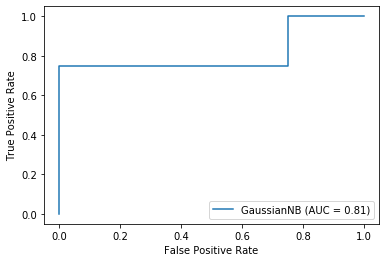

In [14]:
from Models.Naive_Bayes import * 

Naive_Bayes_Model(X_train, Y_train, X_test, Y_test)

### Training/Testing Linear SVM 

/home/franciscoAML/anaconda3/envs/AI/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Results
Accuracy on Training: 1.0
Precision on Training: 1.0
Recall on Training: 1.0
AUC on Training: 1.0

Testing Results
Accuracy on Testing: 0.625
Precision on Testing: 0.667
Recall on Testing: 0.5
AUC on Testing: 0.625


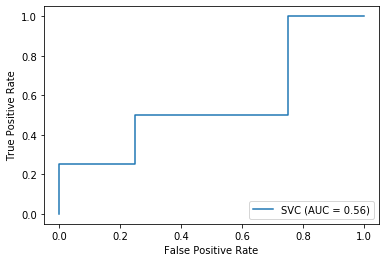

In [15]:
from Models.Linear_SVM import * 

Linear_SVM_Model(X_train, Y_train, X_test, Y_test)

### Training/Testing NonLinear SVM

/home/franciscoAML/anaconda3/envs/AI/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Results
Accuracy on Training: 0.667
Precision on Training: 1.0
Recall on Training: 0.333
AUC on Training: 0.667

Testing Results
Accuracy on Testing: 0.625
Precision on Testing: 1.0
Recall on Testing: 0.25
AUC on Testing: 0.625


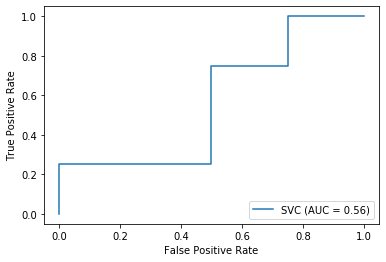

In [16]:
from Models.NonLinear_SVM import * 

NonLinear_Model(X_train, Y_train, X_test, Y_test)

## Compare Results 

In [17]:
# Original Training Results 
data = {"Naive-Bayes":    [original_naive_bayes_test_accuracy, original_naive_bayes_test_precision, 
                            original_naive_bayes_test_recall, original_naive_bayes_test_auc],
        "Linear SVM":    [original_linear_svm_test_accuracy, original_linear_svm_test_precision, 
                            original_linear_svm_test_recall, original_linear_svm_test_auc],
        "Non-Linear SVM":[original_nonlinear_svm_test_accuracy, original_nonlinear_svm_test_precision, 
                            original_nonlinear_svm_test_recall, original_nonlinear_svm_test_auc]}

columns = ["Accuracy", "Precision", "Recall", "AUC"]

# Make Dataframe
df = pd.DataFrame(data).T
df.columns = columns
df

,Accuracy,Precision,Recall,AUC
Naive-Bayes,0.750,0.666667,1.00,0.750
Linear SVM,0.875,1.000000,0.75,0.875
Non-Linear SVM,0.875,1.000000,0.75,0.875


### Naive Bayes Noise Simulation

In [31]:
from util.util import * 

columns = ['Average Blink Rate','Focus Ratio', 'Average Focus Deviation Rate', 'Number of Focused Fixations', 'Mean Focused Fixation Duration',
                                    'Median Focused Fixation Duration', 'Time to First Fixation', 'RFDSD', 'Standard Deviation (X)', 'Standard Deviation (Y)',
                                    'Standard Distance (XY)', 'Number of Saccades', 'Mean Focused Saccade Amplitude', 'Median Focused Saccade Amplitude']

# Make the Split To Add Noise To The Training Dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.4)

noise_list = np.arange(0, 0.5, 0.1)

# Variable List
Naive_L2_Difference_List = []
Naive_Accuracy_List = []
Naive_Precision_List = []
Naive_Recall_List = []
Naive_AUC_List = []

for noise in noise_list:
    # Copy Dataframes
    Noise_X_train = X_train.copy()

    # Loop Through and Add Noise
    noise_mean = 0

    # Convert Panda Dataframe to Numpy Array
    Noise_X_train = Noise_X_train
    Noise_X_train = add_noise(Noise_X_train, noise_mean, noise)
    
    # Convert Numpy Array Back to Dataframe
    Noise_X_train = pd.DataFrame(Noise_X_train)
    Noise_X_train.columns = columns
    
    # Compare the Results
    L2_X = mean_squared_error(X_train, Noise_X_train)
    
    # Call Model
    Naive_Accuracy, Naive_Precision, Naive_Recall, Naive_AUC = Return_Naive_Bayes_Model(Noise_X_train,Y_train,X_test,Y_test)
    
    # Append Results
    Naive_L2_Difference_List.append(L2_X)
    Naive_Accuracy_List.append(Naive_Accuracy)
    Naive_Precision_List.append(Naive_Precision)
    Naive_Recall_List.append(Naive_Recall)
    Naive_AUC_List.append(Naive_AUC)

/home/franciscoAML/anaconda3/envs/AI/lib/python3.7/site-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/franciscoAML/anaconda3/envs/AI/lib/python3.7/site-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/franciscoAML/anaconda3/envs/AI/lib/python3.7/site-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/franciscoAML/anaconda3/envs/AI/lib/python3.7/site-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d

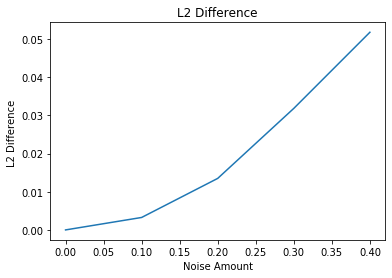

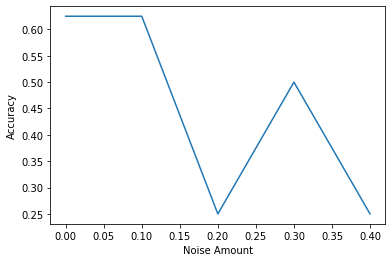

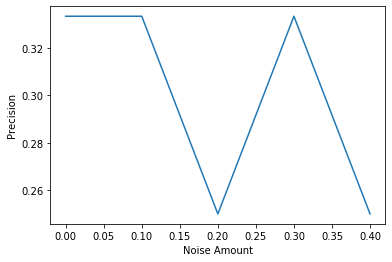

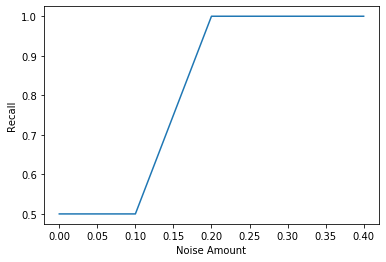

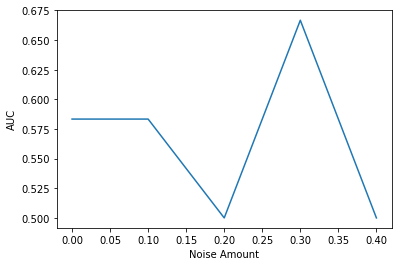

In [32]:
#### Plot Naive Bayes
    
plt.figure()
plt.plot(noise_list, Naive_L2_Difference_List)
plt.title("L2 Difference")
plt.xlabel("Noise Amount")
plt.ylabel("L2 Difference ")

plt.figure()
plt.plot(noise_list, Naive_Accuracy_List)
plt.xlabel("Noise Amount")
plt.ylabel("Accuracy")

plt.figure()
plt.plot(noise_list, Naive_Precision_List)
plt.xlabel("Noise Amount")
plt.ylabel("Precision")

plt.figure()
plt.plot(noise_list, Naive_Recall_List)
plt.xlabel("Noise Amount")
plt.ylabel("Recall")

plt.figure()
plt.plot(noise_list, Naive_AUC_List)
plt.xlabel("Noise Amount")
plt.ylabel("AUC")
plt.show()